In [143]:
# modulos para el analisis
import pandas as pd
import numpy as np
import seaborn as sns
import datetime

# leemos datos sobre terremotos significativos entre los años 1965 y 2016
terremotos = pd.read_csv("datos/terremotos_1965_2016/database.csv")

# seed
np.random.seed(0)

Vamos a estar trabajando con la columna 'Date'. ¿Qué tipo de datos contiene? ¿Cúal es el formato y cómo esta contenida la fecha en esta columna?


In [111]:
terremotos.sample(5) #vemos que la forma de las fechas son mmm/dd/aaaa
#por lo tanto su formato corresponde en Strftime => %m/%d/%Y

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
335,12/26/1965,03:53:12,-5.201,151.583,Earthquake,80.1,NaN,NaN,5.9,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM851979,ISCGEM,ISCGEM,ISCGEM,Automatic
8952,04/03/1988,01:33:06,49.917,78.945,Nuclear Explosion,0.0,NaN,NaN,6.1,MB,...,96.0,NaN,NaN,NaN,0.80,USP0003EM3,US,US,US,Reviewed
21724,04/22/2013,04:36:37,51.098,179.392,Earthquake,18.0,NaN,196.0,5.5,MWB,...,NaN,126.8,NaN,NaN,1.18,USB000GDCD,US,US,US,Reviewed
20018,03/19/2010,08:54:44,-35.541,-73.475,Earthquake,14.4,NaN,264.0,5.5,MWC,...,NaN,60.2,NaN,NaN,NaN,USP000H9P8,US,GUC,GCMT,Reviewed
4309,04/20/1977,23:42:51,-9.890,160.348,Earthquake,19.0,NaN,NaN,7.5,MS,...,NaN,NaN,NaN,NaN,NaN,USP0000NGG,US,US,US,Reviewed


 Vemos que la forma de las fechas son mmm/dd/aaaa. Por lo tanto su formato corresponde en Strftime => %m/%d/%Y

In [112]:
terremotos['Date'].dtype #su formato es %m/%d/%Y, es del tipo Objeto 'O'

dtype('O')

In [113]:
terremotos['Date'].str.len().value_counts()

10    23409
24        3
Name: Date, dtype: int64

<hr>
· Podemos observar que las fechas son strings con 10 carácteres.<br>
 Veo los valores que existen con fechas de más de 10 carácteres

In [114]:
terremotos[terremotos['Date'].str.len() > 10] #también se podría usar np.where([])

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
3378,1975-02-23T02:58:41.000Z,1975-02-23T02:58:41.000Z,8.017,124.075,Earthquake,623.0,NaN,NaN,5.6,MB,...,NaN,NaN,NaN,NaN,NaN,USP0000A09,US,US,US,Reviewed
7512,1985-04-28T02:53:41.530Z,1985-04-28T02:53:41.530Z,-32.998,-71.766,Earthquake,33.0,NaN,NaN,5.6,MW,...,NaN,NaN,NaN,NaN,1.30,USP0002E81,US,US,HRV,Reviewed
20650,2011-03-13T02:23:34.520Z,2011-03-13T02:23:34.520Z,36.344,142.344,Earthquake,10.1,13.9,289.0,5.8,MWC,...,NaN,32.3,NaN,NaN,1.06,USP000HWQP,US,US,GCMT,Reviewed


<hr>
Hay 3 fechas que no corresponden al formato que se eligio para la columna. Debido a que son pocos, voy a arreglar estos datos manualmente para que compartan el mismo formato de los demas valores en la columna.

In [132]:
terremotos['Date'].loc[[3378, 7512, 20650]] = ['02/23/1975','04/28/1985','03/13/2011'] #cambiamos el formato a %m/%d/%Y

<hr>
 <p>Ahora que eliminamos el problema de las tres fechas, procedemos a <i>parsear</i> las fechas. Y creo una serie de pandas para los días del mes en la columna, para hacer un histograma que me asegure que los datos tengan sentido.</p>

<AxesSubplot:xlabel='Date_parsed', ylabel='Count'>

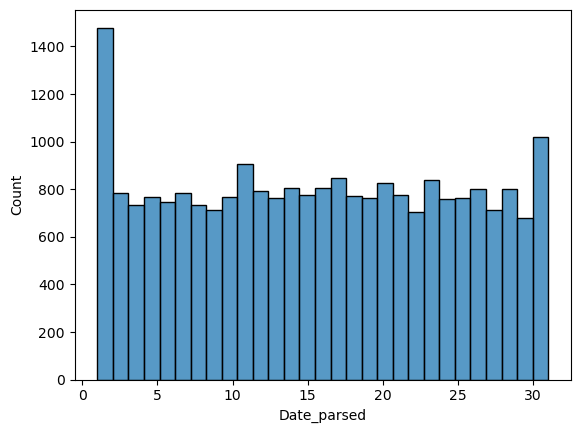

In [142]:
terremotos['Date_parsed'] = pd.to_datetime(terremotos['Date'], format = '%m/%d/%Y')
dias_del_mes_terremotos = terremotos['Date_parsed'].dt.day
sns.histplot(dias_del_mes_terremotos, kde = False)